# **Collect Data**

In [ ]:
# Acceder a google drive
from google.colab import drive
drive.mount('/content/drive')

ubicacion_drive = '/content/drive/MyDrive/6672_Business Predictive Analytics_TP_Grupo 5/FuentesDatos'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Verificar si el archivo se encuentra en la ubicación asignada en el Google Drive
try:
    df_heavy = pd.read_csv(ubicacion_drive + '/heavy_user.csv')
    display(df_heavy.head(5))
except FileNotFoundError:
    print(f"Error: El archivo 'heavy_user.csv' no fue encontrado en la ubicación: {ubicacion_drive}/heavy_user.csv")
    df_heavy = pd.DataFrame()

,Unnamed: 0,SOC,SOH,Charging_Cycles,Battery_Temp,Motor_RPM,Motor_Torque,Motor_Temp,Brake_Pad_Wear,Charging_Voltage,Tire_Pressure,DTC
0,2020-01-01 00:00:00,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,400,34.987175,0
1,2020-01-01 01:00:00,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,400,34.976006,0
2,2020-01-01 02:00:00,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,400,34.961510,0
3,2020-01-01 03:00:00,20.0,99.998996,0,29.370583,0.0,0.0,73.446945,100.0,400,34.949125,0
4,2020-01-01 04:00:00,20.0,99.998749,0,30.808790,0.0,0.0,70.240659,100.0,400,34.935932,0


In [ ]:
# Guardamos el dataset en un archivo .pickle
df_heavy.to_pickle(f'{ubicacion_drive}/df_heavy_procesado.pickle')

# **Quality Cleaning**

## **Cargar Datos**

In [ ]:
df_heavy = pd.read_pickle(f'{ubicacion_drive}/df_heavy_procesado.pickle')

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Overview Data**

Visualización en formato tabular del dataset y denominación de las columnas

In [ ]:
# Correción de las cabeceras
columnas_renombrar = {'Unnamed: 0': 'timestamp',
                      'Charging_Cycles': 'charging_cycles',
                      'Battery_Temp': 'battery_temp',
                      'Motor_RPM': 'motor_rpm',
                      'Motor_Torque': 'motor_torque',
                      'Motor_Temp': 'motor_temp',
                      'Brake_Pad_Wear': 'brake_pad_wear',
                      'Charging_Voltage': 'charging_voltage',
                      'Tire_Pressure': 'tire_pressure',
                      }
df_heavy = df_heavy.rename(columns=columnas_renombrar, inplace=False)

In [ ]:
# Overview del dataset
print("Dimensiones del dataset")
print(df_heavy.shape)
print("Data Overview:")
display(df_heavy.head())
display(df_heavy.tail())
print("\nData Types:")
print(df_heavy.dtypes)
print("\nMissing Values:")
print(df_heavy.isnull().sum())
print("\nDuplicate Rows:")
print(df_heavy.duplicated().sum())
print("\nUnique Values per Column:")
print(df_heavy.nunique().sort_values(ascending=True))

Dimensiones del dataset
(43800, 12)
Data Overview:


,timestamp,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,charging_voltage,tire_pressure,DTC
0,2020-01-01 00:00:00,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,400,34.987175,0
1,2020-01-01 01:00:00,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,400,34.976006,0
2,2020-01-01 02:00:00,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,400,34.961510,0
3,2020-01-01 03:00:00,20.0,99.998996,0,29.370583,0.0,0.0,73.446945,100.0,400,34.949125,0
4,2020-01-01 04:00:00,20.0,99.998749,0,30.808790,0.0,0.0,70.240659,100.0,400,34.935932,0


,timestamp,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,charging_voltage,tire_pressure,DTC
43795,2024-12-29 19:00:00,41.896804,90.120302,29,30.644411,0.0,0.0,73.274256,57.599885,400,29.247296,0
43796,2024-12-29 20:00:00,41.896804,90.120050,29,31.478640,0.0,0.0,71.116980,57.599885,400,29.235478,0
43797,2024-12-29 21:00:00,41.896804,90.119788,29,28.318739,0.0,0.0,71.968694,57.599885,400,29.220806,0
43798,2024-12-29 22:00:00,41.896804,90.119528,29,30.484194,0.0,0.0,70.822133,57.599885,400,29.209373,0
43799,2024-12-29 23:00:00,41.896804,90.119276,29,27.953630,0.0,0.0,70.795872,57.599885,400,29.197121,0



Data Types:
timestamp            object
SOC                 float64
SOH                 float64
charging_cycles       int64
battery_temp        float64
motor_rpm           float64
motor_torque        float64
motor_temp          float64
brake_pad_wear      float64
charging_voltage      int64
tire_pressure       float64
DTC                  object
dtype: object

Missing Values:
timestamp           0
SOC                 0
SOH                 0
charging_cycles     0
battery_temp        0
motor_rpm           0
motor_torque        0
motor_temp          0
brake_pad_wear      0
charging_voltage    0
tire_pressure       0
DTC                 0
dtype: int64

Duplicate Rows:
0

Unique Values per Column:
charging_voltage        1
DTC                     9
charging_cycles       193
SOC                 17714
motor_torque        18247
motor_rpm           18247
brake_pad_wear      18248
SOH                 43800
motor_temp          43800
battery_temp        43800
timestamp           43800
tire_pressu

## **Data Type Mismatch**

Verificar los tipos de datos ante cambios

In [ ]:
# Casteo de los tipos de datos de las columnas
print(f'Tipos de datos de las columnas antes de castear: \n{df_heavy.dtypes}')

columnas_castear = {
        'timestamp': 'datetime64[ns]',
        'DTC': 'category'
    }
df_heavy = df_heavy.astype(columnas_castear)

print(f'\nTipos de datos de las columnas después de castear: \n{df_heavy.dtypes}')

Tipos de datos de las columnas antes de castear: 
timestamp            object
SOC                 float64
SOH                 float64
charging_cycles       int64
battery_temp        float64
motor_rpm           float64
motor_torque        float64
motor_temp          float64
brake_pad_wear      float64
charging_voltage      int64
tire_pressure       float64
DTC                  object
dtype: object

Tipos de datos de las columnas después de castear: 
timestamp           datetime64[ns]
SOC                        float64
SOH                        float64
charging_cycles              int64
battery_temp               float64
motor_rpm                  float64
motor_torque               float64
motor_temp                 float64
brake_pad_wear             float64
charging_voltage             int64
tire_pressure              float64
DTC                       category
dtype: object


In [ ]:
# Diccionario con tipos esperados
expected = {
    "timestamp": "datetime64[ns]",
    "DTC": "category"
}

# Verificación simple
for col, esperado in expected.items():
    if col in df_heavy.columns:
        actual = str(df_heavy[col].dtype)
        if actual == esperado:
            print(f"{col}: OK ")
        else:
            print(f"{col}: Mismatch  (actual={actual}, esperado={esperado})")
    else:
        print(f"{col}: No existe en el DataFrame ")


timestamp: OK 
DTC: OK 


### **Uniform data**

Verificar si hay elementos similares o filas repetidas

In [ ]:
# Verificar los valores únicos de las variables
df_heavy.nunique().sort_values(ascending=True)

,0
charging_voltage,1
DTC,9
charging_cycles,193
SOC,17714
motor_torque,18247
motor_rpm,18247
brake_pad_wear,18248
SOH,43800
motor_temp,43800
battery_temp,43800


**Observaciones:**

Se observa que la columna charging_voltage tiene un único valor, por tanto es irrelevante y no nos genera información para el análisis. Por tanto se elimina. Y también la columna timestamp de igual manera al no generar información relevante.

In [ ]:
print(f'Tamaño del dataset antes de eliminar la columna charging_voltage: {df_heavy.shape}')
df_heavy.drop(columns=['charging_voltage', 'timestamp'], inplace=True)
print(f'Tamaño del dataset después de eliminar la columna charging_voltage: {df_heavy.shape}')

Tamaño del dataset antes de eliminar la columna charging_voltage: (43800, 12)
Tamaño del dataset después de eliminar la columna charging_voltage: (43800, 10)


In [ ]:
# Ver si hay filas duplicadas
df_heavy.duplicated().sum()

np.int64(0)

**Observaciones:**

No hubo filas duplicadas, así que no se elimina ninguna

## **Missing Data**

Verificar si hay valores nulos, y evaluar si imputar esos valores

In [ ]:
df_heavy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SOC              43800 non-null  float64 
 1   SOH              43800 non-null  float64 
 2   charging_cycles  43800 non-null  int64   
 3   battery_temp     43800 non-null  float64 
 4   motor_rpm        43800 non-null  float64 
 5   motor_torque     43800 non-null  float64 
 6   motor_temp       43800 non-null  float64 
 7   brake_pad_wear   43800 non-null  float64 
 8   tire_pressure    43800 non-null  float64 
 9   DTC              43800 non-null  category
dtypes: category(1), float64(8), int64(1)
memory usage: 3.0 MB


**Observaciones:**

Como se observa en la información del dataset, en la columna Non-Null no existen datos nulos, por lo tanto no es necesario eliminar nulos

## **Outliers**

Evaluar que registros son atipicos y eliminarlos, lo analizaremos por columnas categoricas y númericas

In [ ]:
# Creamos dos subdatasets para las variables categoricas y númericas
df_heavy_cat = df_heavy.select_dtypes(include=['category'])
df_heavy_num = df_heavy.select_dtypes(include=['number'])

### ***Columnas Categoricas***

In [ ]:
# Verificar cuantas filas existen por cada tipo de Códigos DTC
df_heavy_cat['DTC'].value_counts()

,count
DTC,
0,42594
P0MR,1006
P0MT,114
P0T,75
P0B,3
"P0T,P0MR",3
P0P,3
"P0MR,P0MT",1
P0S,1


Text(0.5, 1.0, 'Frecuencia de Códigos DTC')

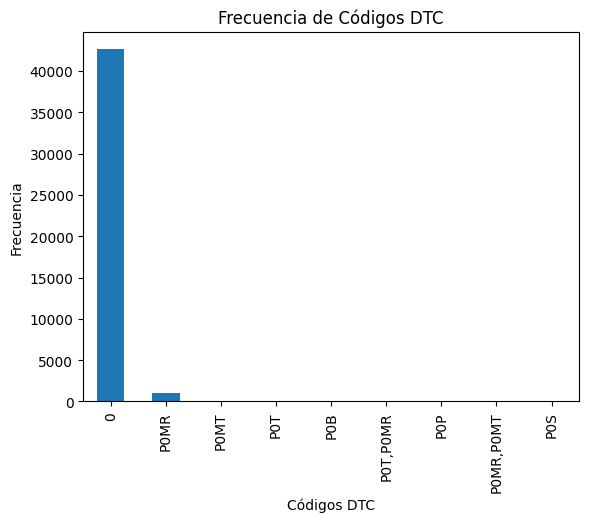

In [ ]:
# Gráficar por cada tipo de Códigos DTC
ax = df_heavy_cat['DTC'].value_counts().plot(kind='bar')
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Códigos DTC")
ax.set_title("Frecuencia de Códigos DTC")


**Observaciones:**

Se observa que la frecuencia en códigos esta sesgado para la izquierda, donde la mayoria de valores se encuentran en 0. Debemos tomar esto en cuenta para el análisis de la etapa posterior

### ***Columnas Numericas***

SOC: 0 valores < límite inferior (-19.47), 0 valores > límite superior (141.27)
SOH: 0 valores < límite inferior (83.03), 0 valores > límite superior (105.98)
charging_cycles: 0 valores < límite inferior (-111.0), 0 valores > límite superior (265.0)
battery_temp: 0 valores < límite inferior (15.52), 3125 valores > límite superior (52.86)
motor_rpm: 0 valores < límite inferior (-2298.58), 1846 valores > límite superior (3830.96)
motor_torque: 0 valores < límite inferior (-459.72), 1846 valores > límite superior (766.19)
motor_temp: 22 valores < límite inferior (60.4), 6324 valores > límite superior (82.0)
brake_pad_wear: 0 valores < límite inferior (0.45), 0 valores > límite superior (134.78)
tire_pressure: 0 valores < límite inferior (21.43), 0 valores > límite superior (35.59)


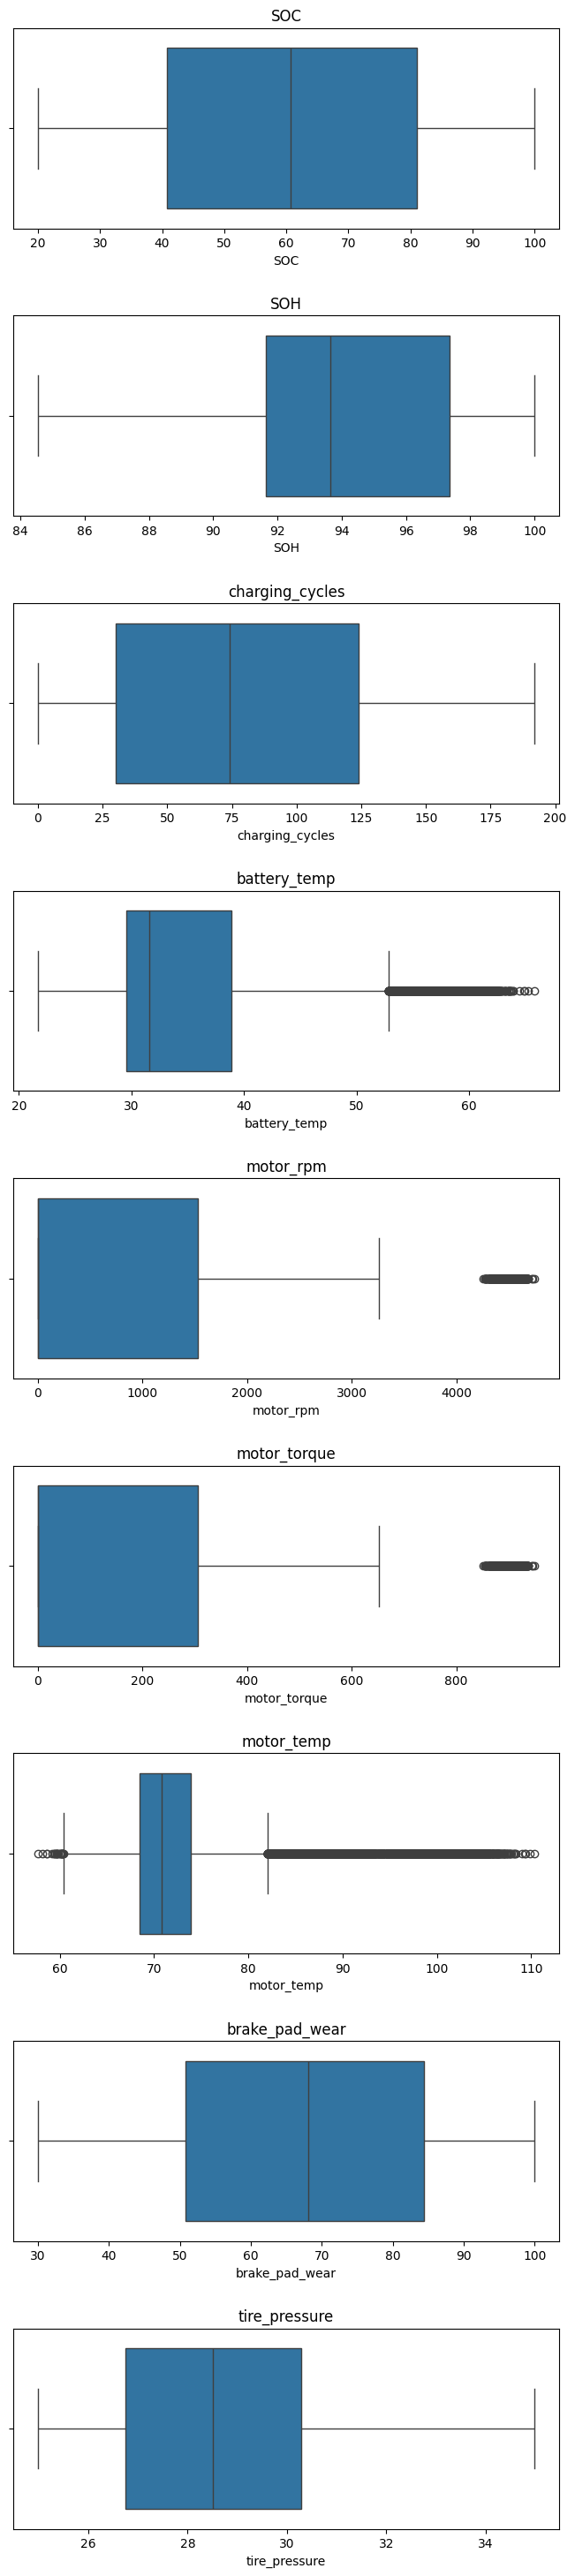

In [ ]:
# Visualizar con el gráfico bloxplot los outliers de manera más clara
columnas_num = df_heavy_num.columns

fig, ax = plt.subplots(nrows=len(columnas_num), ncols=1, figsize=(8, 30))
plt.tight_layout(pad=5, h_pad=5.0, w_pad=5.0)

for i, col in enumerate(columnas_num):
    sns.boxplot(x=col, data=df_heavy_num, ax=ax[i])
    ax[i].set_title(col)

# Verifica cuántos valores están por debajo del mínimo y cuántos por encima del máximo
for col in df_heavy_num.columns:
  Q1 = df_heavy_num[col].quantile(0.25)
  Q3 = df_heavy_num[col].quantile(0.75)
  IQR = Q3 - Q1
  limite_minimo = Q1 - 1.5 * IQR
  limite_maximo = Q3 + 1.5 * IQR

  valores_debajo_minimo = (df_heavy_num[col] < limite_minimo).sum()
  valores_encima_maximo = (df_heavy_num[col] > limite_maximo).sum()

  print(f"{col}: {valores_debajo_minimo} valores < límite inferior ({round(limite_minimo, 2)}), "
        f"{valores_encima_maximo} valores > límite superior ({round(limite_maximo, 2)})")


**Observaciones:**

Como se observa en las variables, hay 4 en total (`battery_temp, motor_rpm, motor_torque, motor_temp`) que tienen valores atípicos. Por lo tanto se analizaran que hacer con estos registros.

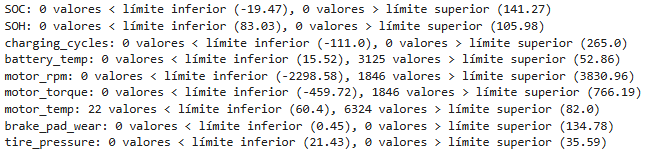

In [ ]:
columnas_atipicas_posibles = ['battery_temp', 'motor_rpm', 'motor_torque', 'motor_temp']

df_heavy[columnas_atipicas_posibles].describe().loc[['min', 'max']]

,battery_temp,motor_rpm,motor_torque,motor_temp
min,21.687029,0.000000,0.000000,57.677255
max,65.834883,4746.911143,949.382229,110.348979


| Variable              | Límite operativo inferior (rojo)                           | Límite físico inferior (imposible) | Límite operativo superior (rojo)     | Límite físico superior (imposible) | Decisión sobre outliers                                                                                                          |
| --------------------- | ---------------------------------------------------------- | ---------------------------------- | ------------------------------------ | ---------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| **Battery_Temp (°C)** | < 20 (demasiado fría, posible ineficiencia térmica)        | < –40 (imposible físicamente)      | > 50 (sobrecalentamiento operativo)  | > 120 (imposible físicamente)      | No se eliminan los valores entre –40 y 120 °C. Aquellos >50 °C se mantienen, pues pueden representar sobrecalentamientos reales. |
| **Motor_RPM**         | < 1000 (vehículo en reposo o arranque)                     | < 0 (imposible)                    | > 12 000 (régimen extremo)           | > 20 000 (imposible físicamente)   | No se eliminan valores hasta 20 000 RPM. Los superiores serían físicamente imposibles y se imputan.                              |
| **Motor_Torque (Nm)** | < 100 (bajo esfuerzo) o < –700 (frenado regenerativo alto) | < –1000 (imposible físicamente)    | > 700 (esfuerzo excesivo)            | > 1000 (imposible físicamente)     | Se conservan valores dentro de ±1000 Nm, ya que reflejan condiciones de carga o frenado intensas.                                |
| **Motor_Temp (°C)**   | < 50 (motor frío o recién encendido)                       | < –40 (imposible físicamente)      | > 120 (sobrecalentamiento operativo) | > 200 (imposible físicamente)      | Se conservan valores entre –40 y 200 °C; temperaturas >120 °C son operativamente extremas pero físicamente posibles.             |


**Observaciones:**

* Battery_Temp (°C): Se identifican valores que superan el límite superior estadístico, pero no sobrepasan el rango físico posible. Se conservan, ya que pueden representar sobrecalentamientos reales útiles para predecir fallas.

* Motor_RPM: Se observan registros por encima del límite típico, aunque dentro del rango operativo máximo del motor (≤20 000 RPM). Se mantienen porque reflejan condiciones reales de exigencia o comportamiento anómalo.

* Motor_Torque (Nm): Existen valores superiores e inferiores al rango intercuartílico, pero todos dentro del rango físico (–1000 a +1000 Nm). Se conservan al considerar que podrían corresponder a momentos de alta carga o frenado regenerativo.

Los outliers detectados no son físicamente imposibles y aportan información relevante sobre condiciones extremas que podrían estar asociadas a fallas; por tanto, no se eliminan del análisis.

## **Basic Stadistics**

In [ ]:
print("Estadísticas básicas de columnas numéricas:")
df_heavy_num.describe()

Estadísticas básicas de columnas numéricas:


,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,60.817630,94.370603,80.127329,35.229109,936.372513,187.274503,73.179096,67.216827,28.519119
std,23.251624,3.225082,55.288573,8.593342,1285.998029,257.199606,8.045529,19.881618,2.056479
min,20.000000,84.549563,0.000000,21.687029,0.000000,0.000000,57.677255,29.985945,24.985802
25%,40.805185,91.632924,30.000000,29.521866,0.000000,0.000000,68.498325,50.819838,26.740318
50%,60.718705,93.641809,74.000000,31.574952,0.000000,0.000000,70.827440,68.093027,28.512844
75%,80.990738,97.369855,124.000000,38.855954,1532.385970,306.477194,73.897828,84.402397,30.280491
max,100.000000,99.999757,192.000000,65.834883,4746.911143,949.382229,110.348979,100.000000,34.987175


In [ ]:
print(f'Dataset final después de la limpieza de datos: {df_heavy.shape}')

Dataset final después de la limpieza de datos: (43800, 10)


In [ ]:
# Guardamos el dataset en un archivo .pickle
df_heavy.to_pickle(f'{ubicacion_drive}/df_heavy_fin_quality_cleaning.pickle')

**Observaciones:**

De la dataset original que tenía (43800, 12) y termino con (43800, 10).

# **EDA (Exploratory Data Analysis)**

*Información General de las variables*

| Variable                          | Qué significa                                                        | Valores normales (referenciales en EV)                                       | Anormales / fuera de rango                                                                                                                                                                        |
| --------------------------------- | -------------------------------------------------------------------- | ---------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **SOC (State of Charge, %)**      | Nivel de carga de la batería (similar al “% batería” en un celular). | 20 % – 90 % en uso. 100 % solo al terminar carga.                            | <10 % (batería casi agotada, riesgo de apagado). >100 % (error de sensor). Cargar siempre al 100 % acelera degradación.                                                                           |
| **SOH (State of Health, %)**      | Salud de la batería, cuánto conserva de su capacidad original.       | 100 % cuando es nueva. >80 % tras 3–5 años.                                  | <70 % indica batería degradada, menos autonomía, mayor riesgo de fallas y reemplazo cercano.                                                                                                      |
| **Charging_Cycles**               | Número acumulado de ciclos completos de carga (de 0 % a 100 %).      | EV modernos: 1,000–3,000 ciclos útiles antes de degradación fuerte.          | Muy alto (ej. >2000) = batería cerca de fin de vida. Valor = 0 = batería nueva o sin ciclos completos todavía.                                                                                    |
| **Battery_Temp (°C)**             | Temperatura interna de la batería.                                   | 20–40 °C ideal. Operativo seguro: 0–50 °C.                                   | >50 °C acelera degradación y riesgo de incendio (“thermal runaway”). <0 °C reduce autonomía, riesgo de fallo en carga.                                                                            |
| **Motor_RPM**                     | Revoluciones por minuto del motor eléctrico.                         | 1,000–8,000 rpm en conducción normal. Algunos EV llegan a 14,000–16,000 rpm. | RPM = 0 puede ser reposo. RPM muy alto constante (>12,000) = posible sobreuso o error en transmisión.                                                                                             |
| **Motor_Torque (Nm)**             | Par (fuerza de giro) que entrega el motor.                           | Autos: 100–400 Nm. Buses/camiones: hasta >1000 Nm.                           | Torque muy bajo con RPM alto = deslizamiento o falla. Torque excesivo en arranques = desgaste acelerado.                                                                                          |
| **Motor_Temp (°C)**               | Temperatura del motor eléctrico.                                     | 50–90 °C en operación normal. Máximo tolerado: 120–150 °C.                   | >120 °C riesgo de dañar aislamiento y bobinados. <20 °C en operación puede indicar error de sensor.                                                                                               |
| **Brake_Pad_Wear (%)**            | Porcentaje de desgaste de las pastillas de freno.                    | 0 % = nuevas, <70 % = aceptable.                                             | >80 % = pastillas muy gastadas, riesgo de falla de freno. 100 % = inoperativo.                                                                                                                    |
| **Tire_Pressure (PSI)**           | Presión de los neumáticos.                                           | Autos livianos: 30–35 PSI. Buses/pesados: 40–60 PSI.                         | <25 PSI = riesgo de reventón, mayor consumo. >45 PSI en autos = menos adherencia, desgaste irregular.                                                                                             |
| **DTC (Diagnostic Trouble Code)** | Código de diagnóstico de problemas que genera el vehículo.           | “0” = sin fallo.                                                             | Códigos como `P0B` (batería), `P0T` (torque), `P0MR` (rotor motor), `P0MT` (temperatura motor), etc. Cada uno indica tipo de problema detectado. Combinados (ej. `P0MR,P0MT`) = fallas múltiples. |


*Tabla de Semáforo de variables*

| Variable                 | Verde (normal)  | Amarillo (precaución)               | Rojo (riesgo/fuera de rango)                                                                |
| ------------------------ | --------------- | ----------------------------------- | ------------------------------------------------------------------------------------------- |
| **SOC (%)**              | 20–90           | <20 o >90                           | <10 (muy baja, riesgo de apagado) / >100 (error sensor)                                     |
| **SOH (%)**              | 85–100          | 70–85                               | <70 (batería degradada, fin de vida útil cercano)                                           |
| **Charging_Cycles**      | 0–100           | 100–500                             | >500 (desgaste avanzado). En dataset máximo=192, por lo que se ve solo zona verde/amarilla. |
| **Battery_Temp (°C)**    | 20–40           | 40–50                               | >50 (sobrecalentamiento, riesgo de fallo)                                                   |
| **Motor_RPM**            | 1,000–8,000     | 8,000–12,000                        | >12,000 (sobreuso o transmisión dañada)                                                     |
| **Motor_Torque (Nm)**    | 100–400 (autos) | 400–700                             | >700 (esfuerzo excesivo, riesgo de daño)                                                    |
| **Motor_Temp (°C)**      | 50–90           | 90–120                              | >120 (sobrecalentamiento crítico)                                                           |
| **Brake_Pad_Wear (%)**   | 0–60            | 60–80                               | >80 (pastillas casi inservibles, riesgo de accidente)                                       |                                      |
| **Tire_Pressure (PSI)**  | 30–35           | 25–30 o 35–40                       | <25 (riesgo reventón, más consumo) / >40 (desgaste irregular, poca adherencia)              |
| **DTC**                  | 0 (sin fallo)   | DTC simples (P0MR, P0MT, P0T, etc.) | DTC múltiples (ej. P0MR,P0MT) = falla más grave                                             |


*Tabla de códigos DTC*

| Código DTC                       | Significado (interpretación en EV)    | Posible causa técnica                                               |
| -------------------------------- | ------------------------------------- | ------------------------------------------------------------------- |
| **0**                            | Sin falla detectada                   | Operación normal                                                    |
| **P0MR**                         | Falla en el rotor del motor eléctrico | Problema mecánico o eléctrico en el motor                           |
| **P0MT**                         | Falla de temperatura del motor        | Sobrecalentamiento, falla de refrigeración                          |
| **P0T**                          | Falla en el torque del motor          | Desbalance entre RPM y torque, posible fallo en control de potencia |
| **P0P**                          | Falla de potencia general             | Problemas de suministro de energía, inversor o controlador          |
| **P0B**                          | Falla de batería                      | Voltaje fuera de rango, celda defectuosa, degradación fuerte        |
| **P0S**                          | Falla de sensor                       | Sensor defectuoso o lectura fuera de rango                          |
| **Combinados** (ej. `P0MR,P0MT`) | Falla múltiple                        | Se detectaron dos o más problemas simultáneos                       |


## **Cargar Datos**

In [ ]:
df_heavy = pd.read_pickle(f'{ubicacion_drive}/df_heavy_fin_quality_cleaning.pickle')

**Pregunta de negocio:**
¿Qué características de los vehículos electrícos tienen mayor tasa de fallos?

## **Conjunto de datos después de la limpieza**

Se recolecto información del dataset `(heavy_user.csv`) con 43800 filas y 10 columnas posterior a la limpieza de datos.

## **Lectura del dataset**

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(f'Dimensiones del dataset: {df_heavy.shape}')
df_heavy.head()

Dimensiones del dataset: (43800, 10)


,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure,DTC
0,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,34.987175,0
1,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,34.976006,0
2,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,34.961510,0
3,20.0,99.998996,0,29.370583,0.0,0.0,73.446945,100.0,34.949125,0
4,20.0,99.998749,0,30.808790,0.0,0.0,70.240659,100.0,34.935932,0


## **Análisis Exploratorio**

Se llevará a cabo tres fases:
1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir (en este caso DTC)
3. Análisis multivariado: relación de pares de varaibles predictoras con la variable a predecir.

### **1. Análisis de cada variable de manera individual**

In [ ]:
# Información de cada columna
df_heavy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SOC              43800 non-null  float64 
 1   SOH              43800 non-null  float64 
 2   charging_cycles  43800 non-null  int64   
 3   battery_temp     43800 non-null  float64 
 4   motor_rpm        43800 non-null  float64 
 5   motor_torque     43800 non-null  float64 
 6   motor_temp       43800 non-null  float64 
 7   brake_pad_wear   43800 non-null  float64 
 8   tire_pressure    43800 non-null  float64 
 9   DTC              43800 non-null  category
dtypes: category(1), float64(8), int64(1)
memory usage: 3.0 MB


**Observaciones:**

Notamos que la mayoría de variables son numéricas, y solo la variable a predecir es categorica.

### **1.1. Variables Categoricas**

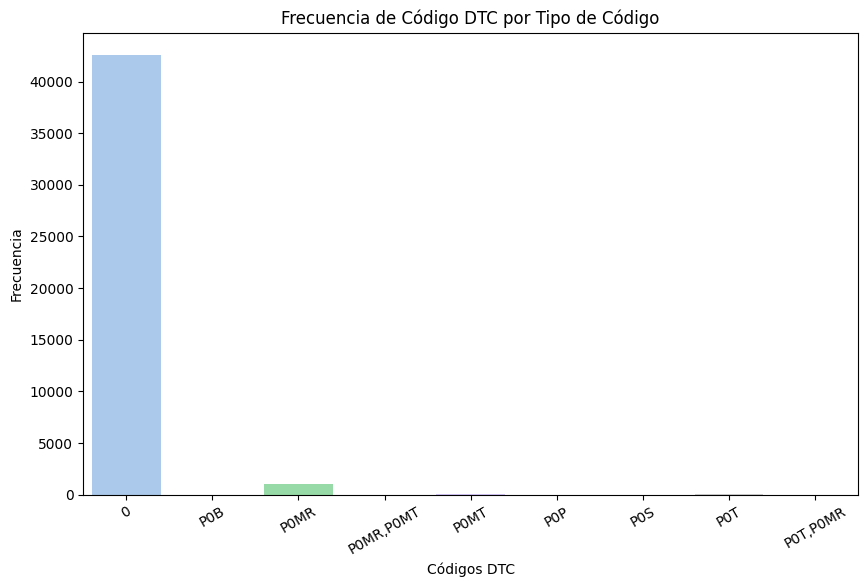

In [ ]:
# Tomamos unicamente la variable categorica DTC y generamos un gráficos de barras
plt.figure(figsize=(10,6))
sns.countplot(x='DTC', data=df_heavy, hue='DTC', palette='pastel', legend=False)
plt.title("Frecuencia de Código DTC por Tipo de Código")
plt.xticks(rotation=30)
plt.ylabel("Frecuencia")
plt.xlabel("Códigos DTC")
plt.show()

**Observaciones:**

* DTC: La gran mayoría de códigos se encuentra en 0, y los códigos se separan en varias categorías, por tanto se considera agruparlo en binario, donde 0 se considera no falla, y 1 con falla.



### **1.2. Variables Numéricas**

Ahora veremos el comportamiento de las variables númericas

In [ ]:
df_heavy.describe()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,60.817630,94.370603,80.127329,35.229109,936.372513,187.274503,73.179096,67.216827,28.519119
std,23.251624,3.225082,55.288573,8.593342,1285.998029,257.199606,8.045529,19.881618,2.056479
min,20.000000,84.549563,0.000000,21.687029,0.000000,0.000000,57.677255,29.985945,24.985802
25%,40.805185,91.632924,30.000000,29.521866,0.000000,0.000000,68.498325,50.819838,26.740318
50%,60.718705,93.641809,74.000000,31.574952,0.000000,0.000000,70.827440,68.093027,28.512844
75%,80.990738,97.369855,124.000000,38.855954,1532.385970,306.477194,73.897828,84.402397,30.280491
max,100.000000,99.999757,192.000000,65.834883,4746.911143,949.382229,110.348979,100.000000,34.987175


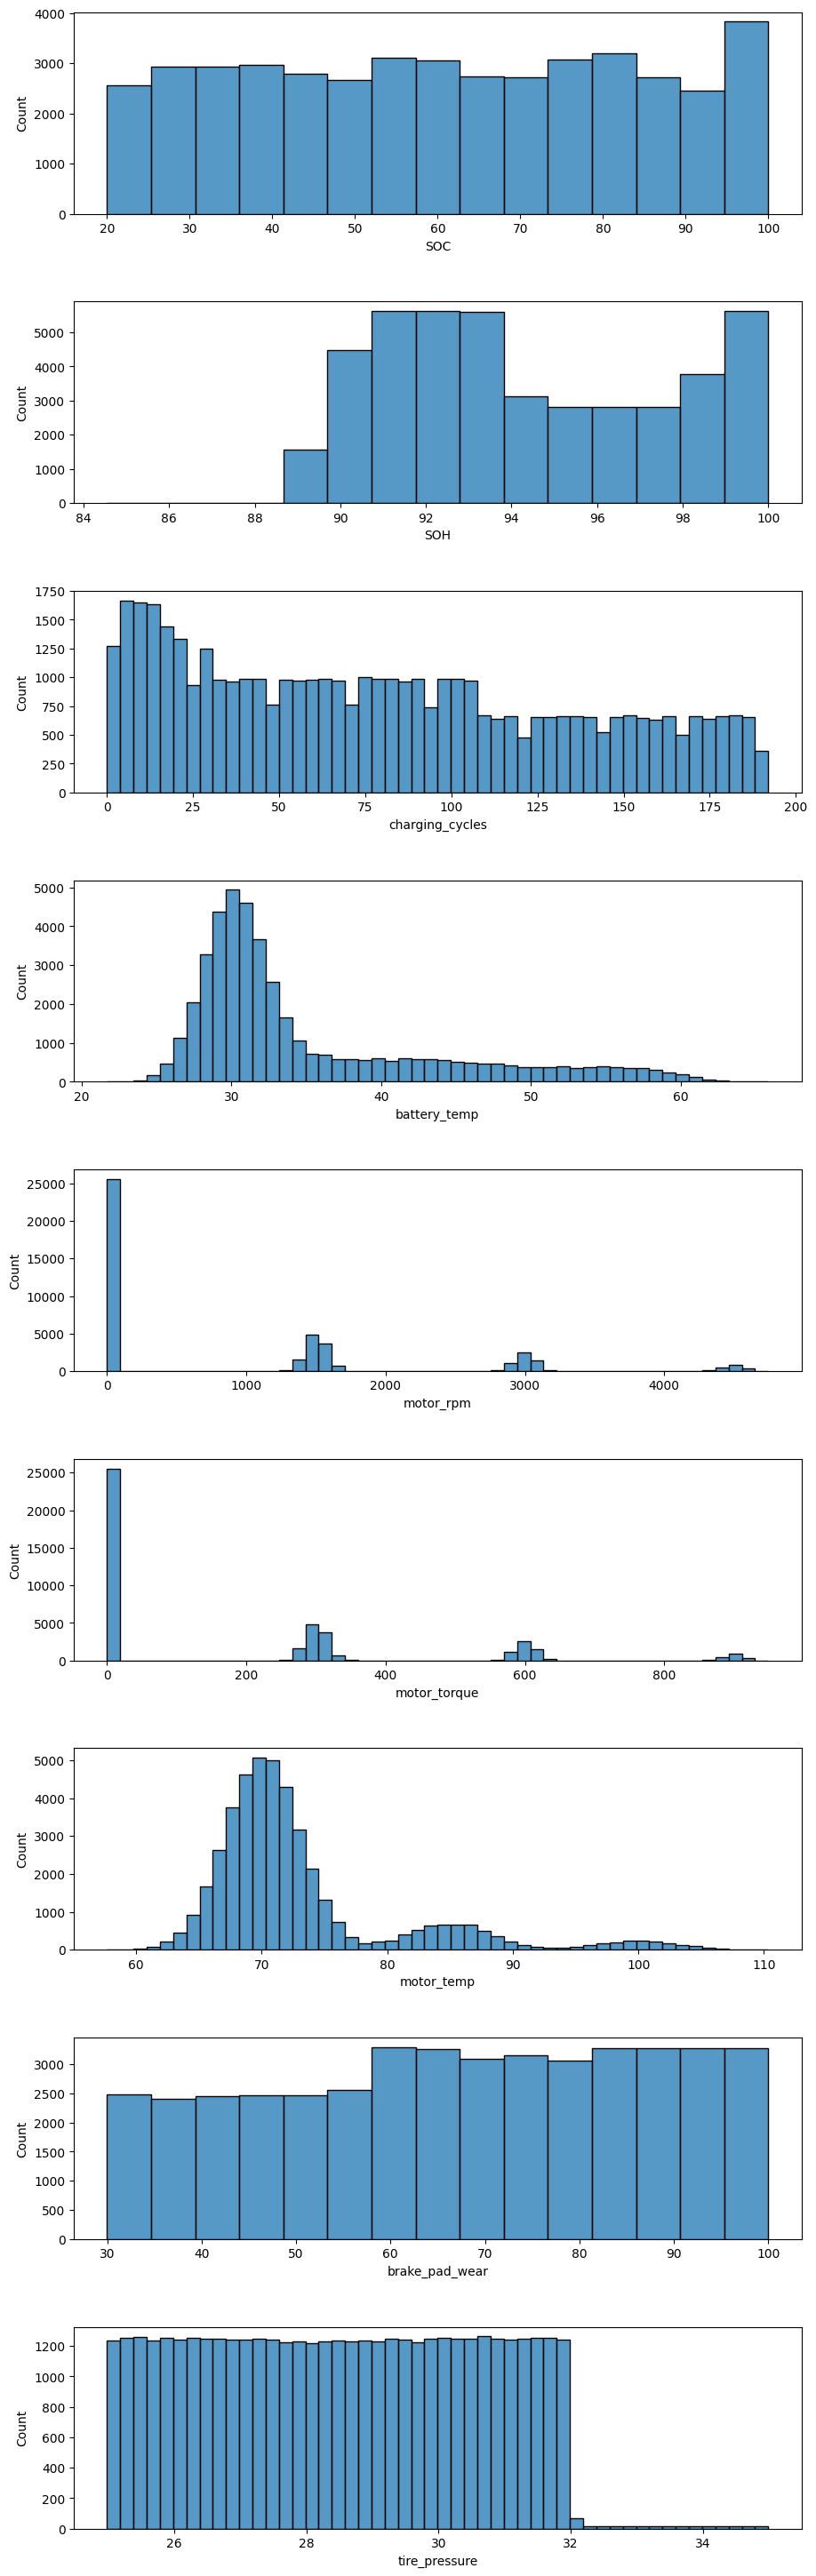

In [ ]:
# Dibujar histogramas para ver la distribución de las variables númericas
columnas_num = df_heavy.select_dtypes(include='number').columns
fig, ax = plt.subplots(nrows=len(columnas_num), ncols=1, figsize=(10,30))
fig.tight_layout(pad=5, h_pad=5.0, w_pad=5.0)

for i, col in enumerate(columnas_num):
  if col in ['SOC', 'SOH', 'brake_pad_wear']:
    sns.histplot(x=col, data=df_heavy, ax=ax[i], bins=15)
  else:
    sns.histplot(x=col, data=df_heavy, ax=ax[i], bins=50)

**Observaciones:**

* SOC: Presenta una distribución uniforme entre 20 % y 100 %, indicando que los vehículos fueron registrados en diferentes niveles de carga, lo cual refleja diversos estados operativos del sistema eléctrico.

* SOH: La mayor parte de los valores se concentra entre 90 % y 100 %, lo que evidencia que la mayoría de las baterías mantiene una buena salud. Solo unos pocos registros con valores más bajos podrían corresponder a unidades con mayor desgaste o antigüedad.

* Charging Cycles: Muestra una distribución sesgada a la derecha, con alta frecuencia en valores bajos. Esto sugiere que predominan vehículos nuevos o con pocos ciclos de carga acumulados.

* Battery Temp: Se observa un pico alrededor de 30 °C y una cola hacia valores mayores, lo que indica un comportamiento normal en la mayoría de los casos y algunos escenarios de sobrecalentamiento.

* Motor RPM: Exhibe una distribución multimodal, con picos en 0, 1500, 3000 y 4500 RPM. Esto representa distintos regímenes de operación (reposo, media y alta velocidad) típicos de un sistema de propulsión eléctrica.

* Motor Torque: Similar a la variable anterior, muestra un gran número de registros en 0 y varios picos en niveles más altos. Refleja las distintas cargas de torque aplicadas durante las fases de aceleración o frenado regenerativo.

* Motor Temp: Posee tres picos principales (~70 °C, ~85 °C y ~100 °C), lo que podría estar asociado a diferentes modos de funcionamiento o condiciones de conducción. Las temperaturas más elevadas podrían indicar periodos de mayor exigencia térmica.

* Brake Pad Wear: Presenta una distribución casi uniforme entre 30 % y 100 %, evidenciando que existen diferentes grados de desgaste de las pastillas de freno dentro de la muestra.

* Tire Pressure: Registra valores estables entre 25 y 31 PSI, con una caída abrupta después de 32 PSI. Esto sugiere que la mayoría de los neumáticos mantiene la presión adecuada y solo algunos casos se desvían de los límites recomendados.

Los datos muestran que las variables del vehículo eléctrico se comportan de forma normal y dentro de los rangos esperados.

### **2. Análisis univariado**

Tasa de fallos: 0.0275 (2.75%)
Tasa de conversión sin fallos: 97.25% | Tasa de conversión con fallos: 2.75% | Total de registros: 43800


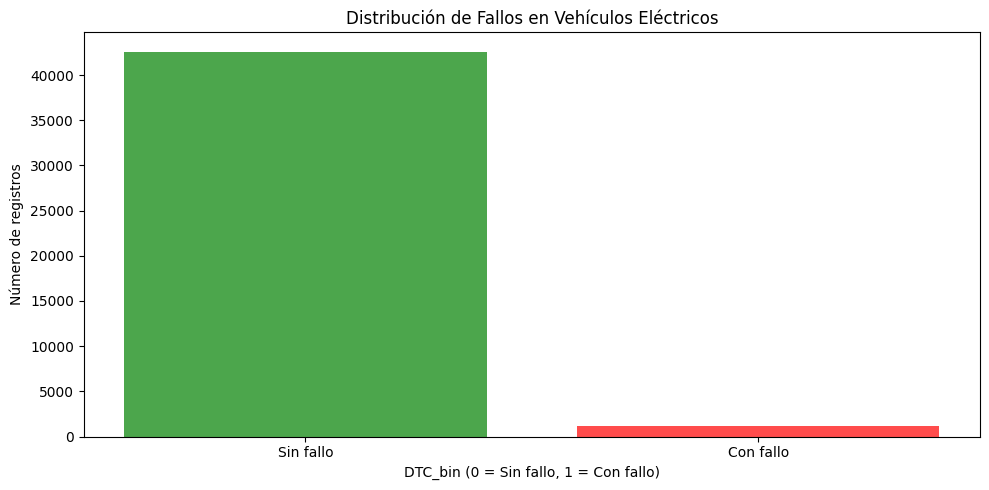

In [ ]:
# Representamos la variable a predecir de forma binaria
df_heavy['DTC_bin'] = df_heavy['DTC'].astype(str).apply(lambda x: 0 if x.strip() == '0' else 1)

tasa_fallo = df_heavy['DTC_bin'].mean()
print("Tasa de fallos:", round(tasa_fallo, 4), f"({round(tasa_fallo * 100, 2)}%)")

counts = df_heavy['DTC_bin'].value_counts().sort_index()
values = [counts.get(0, 0), counts.get(1, 0)]

# Creación de gráfica
plt.figure(figsize=(10, 5))
bars = plt.bar([0, 1], values, color=['green', 'red'], alpha=0.7)

plt.title('Distribución de Fallos en Vehículos Eléctricos')
plt.xlabel('DTC_bin (0 = Sin fallo, 1 = Con fallo)')
plt.ylabel('Número de registros')

# Calcular totales
total = sum(values)
tasa_sin_fallo = round(values[0] / total * 100, 2)
tasa_con_fallo = round(values[1] / total * 100, 2)

# Mostrar resultados en consola
print(f"Tasa de conversión sin fallos: {tasa_sin_fallo}% | "f"Tasa de conversión con fallos: {tasa_con_fallo}% | "f"Total de registros: {total}")

plt.xticks([0, 1], ['Sin fallo', 'Con fallo'])
plt.tight_layout()
plt.show()


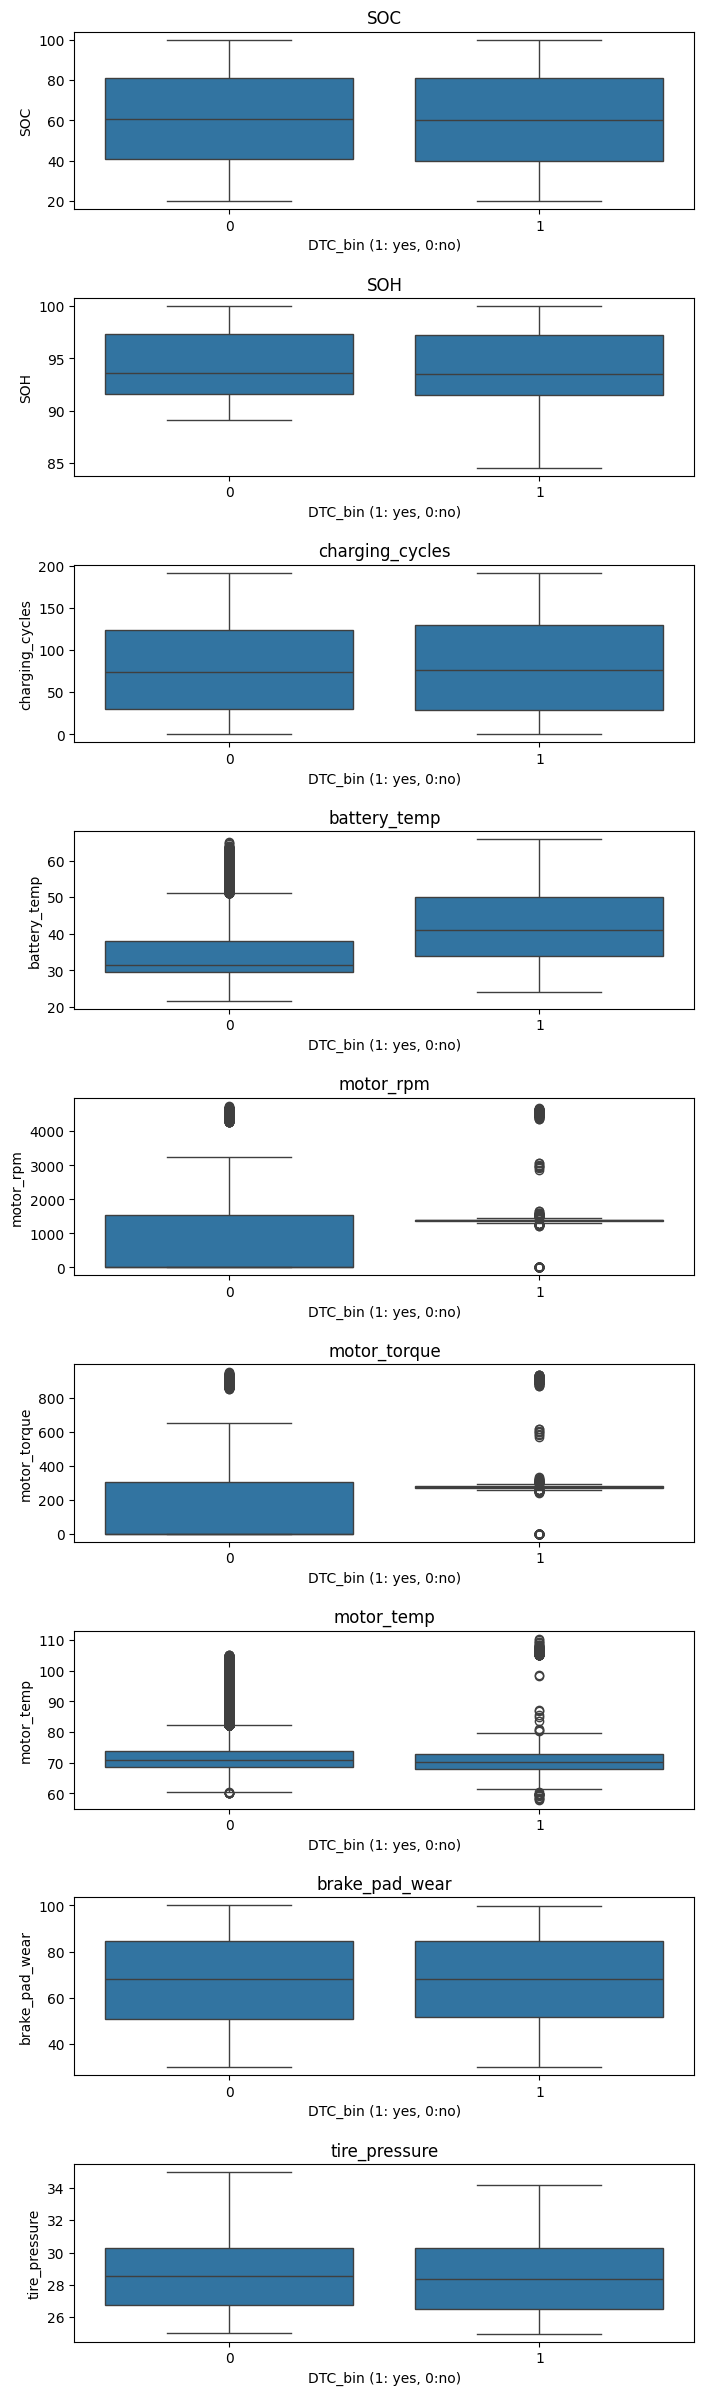

In [ ]:
# Analizamos la relación entre las variables númerica y la variable a predecir
fig, ax = plt.subplots(nrows=len(columnas_num), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=.50)

for i, col in enumerate(columnas_num):
  bplt = sns.boxplot(x="DTC_bin", y=col, data=df_heavy, ax=ax[i])
  ax[i].set_xlabel('DTC_bin (1: yes, 0:no)')
  ax[i].set_title(col)

**Observaciones:**

* SOC: Los valores de carga (SOC) no presentan diferencias marcadas entre vehículos con o sin fallos; ambos grupos muestran medianas y rangos similares, lo que sugiere poca relación directa con la variable objetivo.

* SOH: La salud de la batería se mantiene alta y estable en ambos grupos. No se aprecia una diferencia significativa entre los que presentan fallos y los que no, indicando que el estado general de la batería no es determinante inmediato en la aparición de fallos.

* Charging Cycles: La distribución es semejante entre las dos clases; sin embargo, los vehículos con fallos tienden a mostrar una leve mayor dispersión, lo que podría indicar que un mayor número de ciclos acumulados incrementa ligeramente la probabilidad de error.

* Battery Temp: Se nota un cambio más claro: los vehículos con fallos tienen temperaturas de batería más elevadas en promedio y menor concentración de valores bajos. Esto sugiere que el calor podría ser un factor asociado a la generación de fallos.

* Motor RPM: En los casos con fallo, los valores de RPM son más concentrados y con presencia de outliers. Esto podría reflejar interrupciones en el funcionamiento del motor o lecturas anómalas durante fallos.

* Motor Torque: Exhibe un patrón similar al de motor_rpm: los registros con fallos presentan mayor dispersión y algunos valores atípicos, lo que podría indicar picos de torque asociados a condiciones irregulares o estrés mecánico.

* Motor Temp: Se observa un ligero aumento en la temperatura promedio de los motores con fallos y una mayor cantidad de valores extremos. Esto sugiere que el sobrecalentamiento del motor puede influir en la ocurrencia de fallos.

* Brake Pad Wear: Los niveles de desgaste de freno son bastante similares entre ambas categorías, sin evidencias de relación directa con la variable de fallo.

* Tire Pressure: Las presiones se mantienen constantes en ambos grupos, dentro de rangos normales, sin relación aparente con los fallos detectados.

In [ ]:
# Función para graficar tasas de conversión
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir
    grupo = df_heavy.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Generar gráfica
    if type=='line':
        plt.figure(figsize=(10,5))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar':
        plt.figure(figsize=(14,5))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()

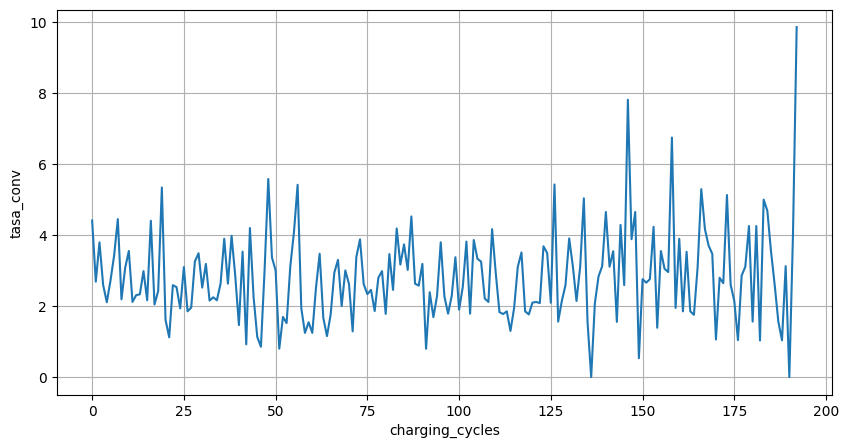

In [ ]:
graficar_tasas_conversion('charging_cycles','DTC_bin', 'line')

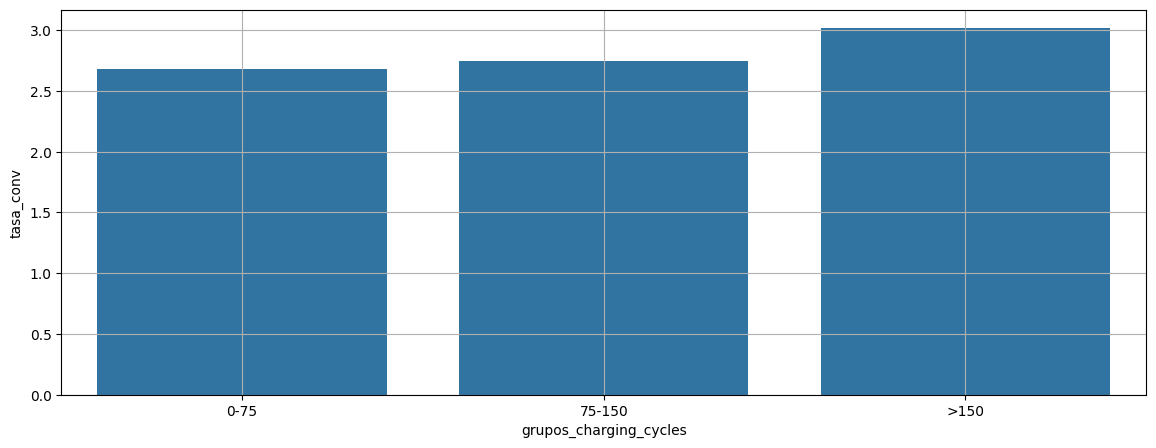

In [ ]:
# Nueva columna en el dataset: "grupos_charging_cycles"
df_heavy.loc[:,'grupos_charging_cycles'] = "0-75"
df_heavy.loc[df_heavy['charging_cycles']>150,'grupos_charging_cycles'] = ">150"
df_heavy.loc[(df_heavy['charging_cycles']>75)&(df_heavy['charging_cycles']<=150), 'grupos_charging_cycles'] = "75-150"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_charging_cycles','DTC_bin',type='bar')

**Observaciones:**
La tasa de fallos se mantiene estable (~2.7 – 3 %) en todos los rangos, sin un incremento evidente a medida que aumentan los ciclos de carga. Esto sugiere que el número de recargas no influye directamente en la aparición de fallos, al menos dentro de los valores registrados.

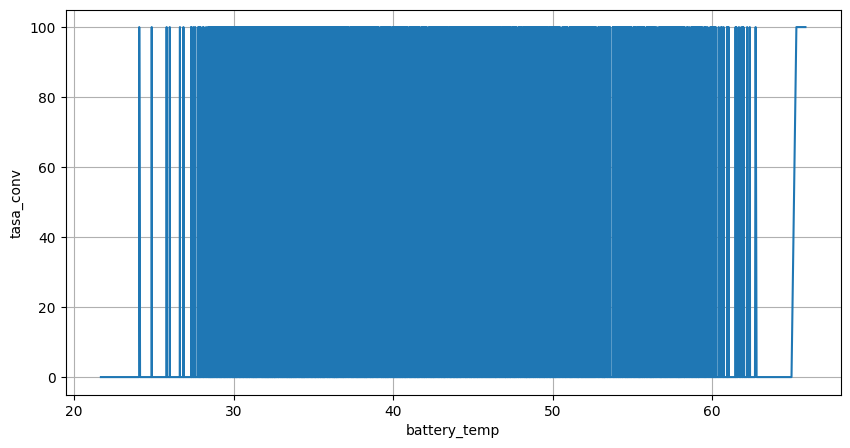

In [ ]:
graficar_tasas_conversion('battery_temp','DTC_bin', 'line')

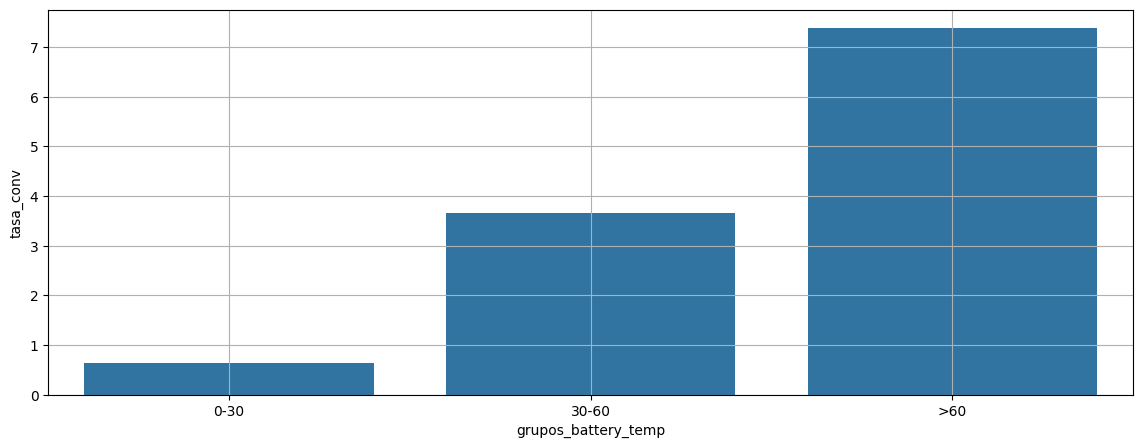

In [ ]:
# Nueva columna en el dataset: "grupos_battery_temp"
df_heavy.loc[:, 'grupos_battery_temp'] = "0-30"
df_heavy.loc[df_heavy['battery_temp'] > 60, 'grupos_battery_temp'] = ">60"
df_heavy.loc[(df_heavy['battery_temp'] > 30) & (df_heavy['battery_temp'] <= 60), 'grupos_battery_temp'] = "30-60"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_battery_temp', 'DTC_bin', type='bar')

**Observaciones:**
Se observa una clara tendencia ascendente: a mayor temperatura, mayor tasa de fallos. En el rango de 0-30 °C la tasa es muy baja (~0.8 %), sube a casi 4 % entre 30-60 °C y supera el 7 % por encima de 60 °C.

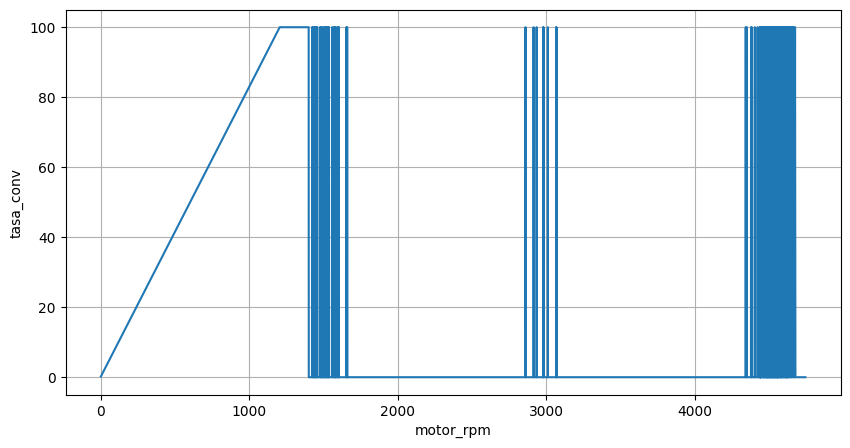

In [ ]:
graficar_tasas_conversion('motor_rpm','DTC_bin', 'line')

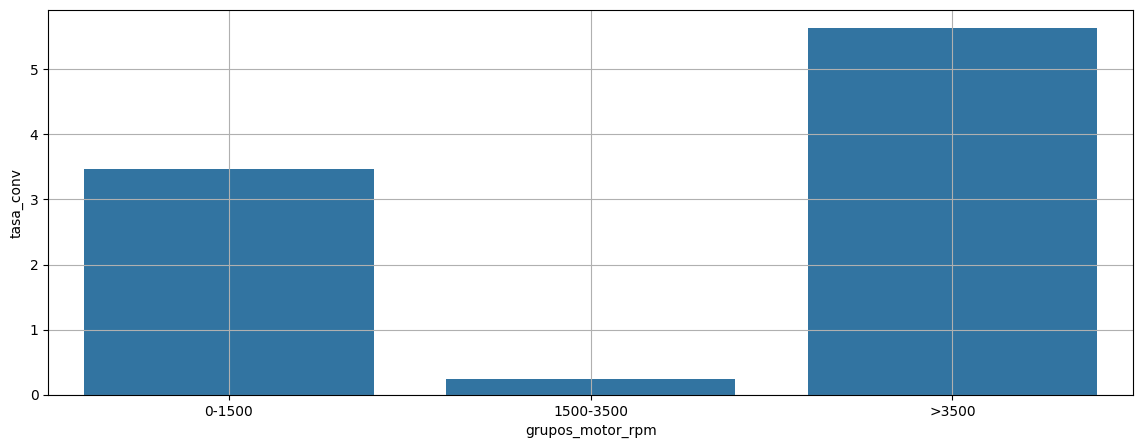

In [ ]:
# Nueva columna en el dataset: "grupos_motor_rpm"
df_heavy.loc[:,'grupos_motor_rpm'] = "0-1500"
df_heavy.loc[df_heavy['motor_rpm']>3500,'grupos_motor_rpm'] = ">3500"
df_heavy.loc[(df_heavy['motor_rpm']>1500)&(df_heavy['motor_rpm']<=3500), 'grupos_motor_rpm'] = "1500-3500"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_motor_rpm','DTC_bin',type='bar')

**Observaciones:**
Presenta un patrón en “U”: altas tasas de fallo en valores muy bajos (<1500 RPM) y muy altos (>3500 RPM), pero una tasa mínima en el rango intermedio (1500-3500 RPM).

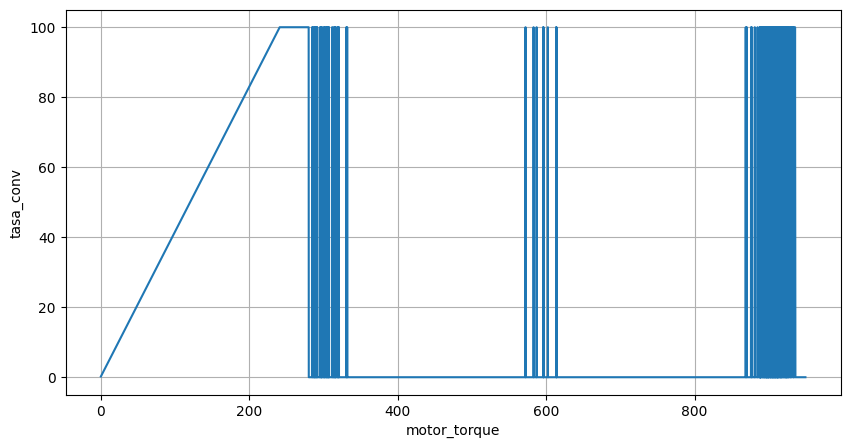

In [ ]:
graficar_tasas_conversion('motor_torque','DTC_bin', 'line')

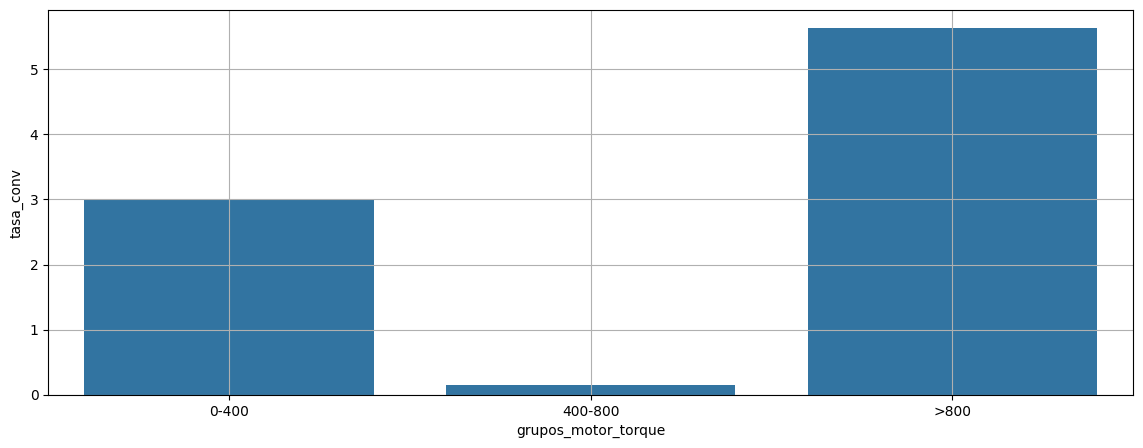

In [ ]:
# Nueva columna en el dataset: "grupos_motor_torque"
df_heavy.loc[:,'grupos_motor_torque'] = "0-400"
df_heavy.loc[df_heavy['motor_torque']>800,'grupos_motor_torque'] = ">800"
df_heavy.loc[(df_heavy['motor_torque']>400)&(df_heavy['motor_torque']<=800), 'grupos_motor_torque'] = "400-800"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_motor_torque','DTC_bin',type='bar')

**Observaciones:**
Su comportamiento es casi idéntico al de las RPM: tasas más altas en niveles muy bajos (<400 Nm) y muy altos (>800 Nm), con una caída intermedia.

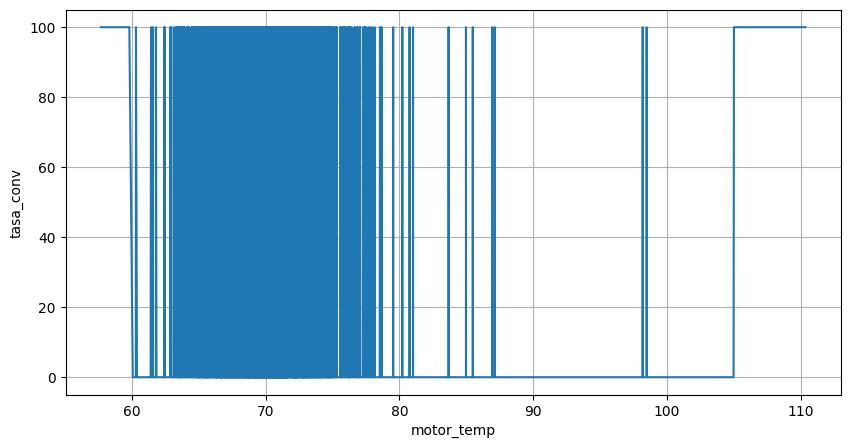

In [ ]:
graficar_tasas_conversion('motor_temp','DTC_bin', 'line')

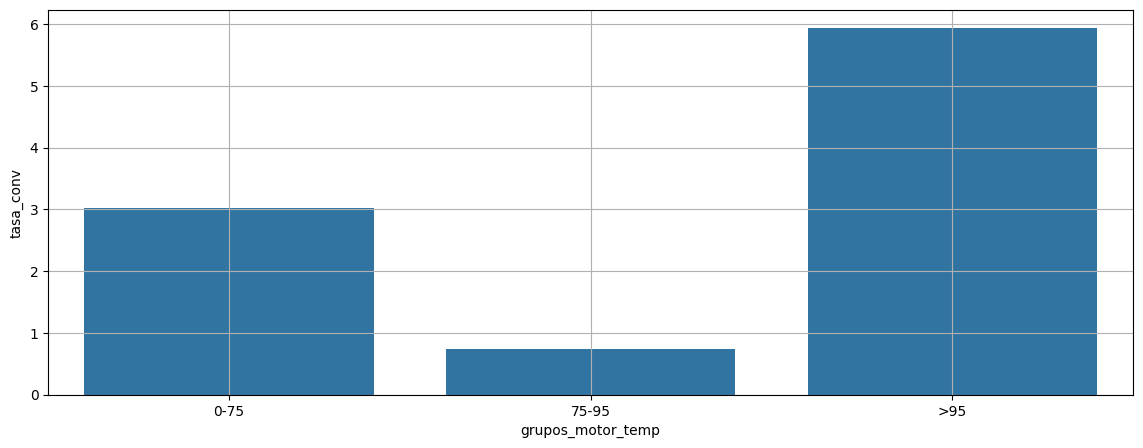

In [ ]:
# Nueva columna en el dataset: "grupos_motor_temp"
df_heavy['grupos_motor_temp'] = "0-75"
df_heavy.loc[df_heavy['motor_temp'] > 95, 'grupos_motor_temp'] = ">95"
df_heavy.loc[(df_heavy['motor_temp'] > 75) & (df_heavy['motor_temp'] <= 95), 'grupos_motor_temp'] = "75-95"

# Graficar tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_motor_temp', 'DTC_bin', type='bar')


**Observaciones:**
Muestra una clara correlación positiva con los fallos. Los vehículos con temperaturas mayores a 95 °C tienen tasas cercanas al 6 %, mientras que por debajo de 75 °C la tasa ronda el 3 %.

## **Resumen**

Las variables que más influyen en la aparición de fallos (DTC_bin), según la tasa de conversión observada, son las siguientes:

* battery_temp: es la que más destaca, ya que a mayor temperatura de la batería, aumenta de forma clara la probabilidad de fallo, llegando a más del 7 % en los rangos más altos.

* motor_temp: también muestra una relación directa con los fallos; los vehículos con temperaturas del motor por encima de 95 °C presentan una tasa de error considerablemente mayor.

* motor_torque: presenta un comportamiento mixto: los fallos tienden a concentrarse en valores muy bajos o muy altos de torque, reflejando posibles picos de esfuerzo o condiciones irregulares.

* motor_rpm: sigue una tendencia parecida al torque, con más fallos en revoluciones extremas, tanto muy bajas como muy altas.

* charging_cycles: apenas muestra variaciones, lo que sugiere que el número de ciclos de carga no tiene un impacto importante en la aparición de fallos.

### **3. Análisis bivariado**

In [ ]:
# Tasa de conversión para dos columnas
def graficar_bivariada(col_list, orden=None):
  tc = df_heavy.groupby(col_list)['DTC_bin'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(
        x=tc['DTC_bin'],
        y=tc[col_list[0]],
        hue=tc[col_list[1]],
        linestyle='none',
        markers='o',
        order=orden
        )
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversión (%)')
  plt.xlim((0,1))
  plt.show()

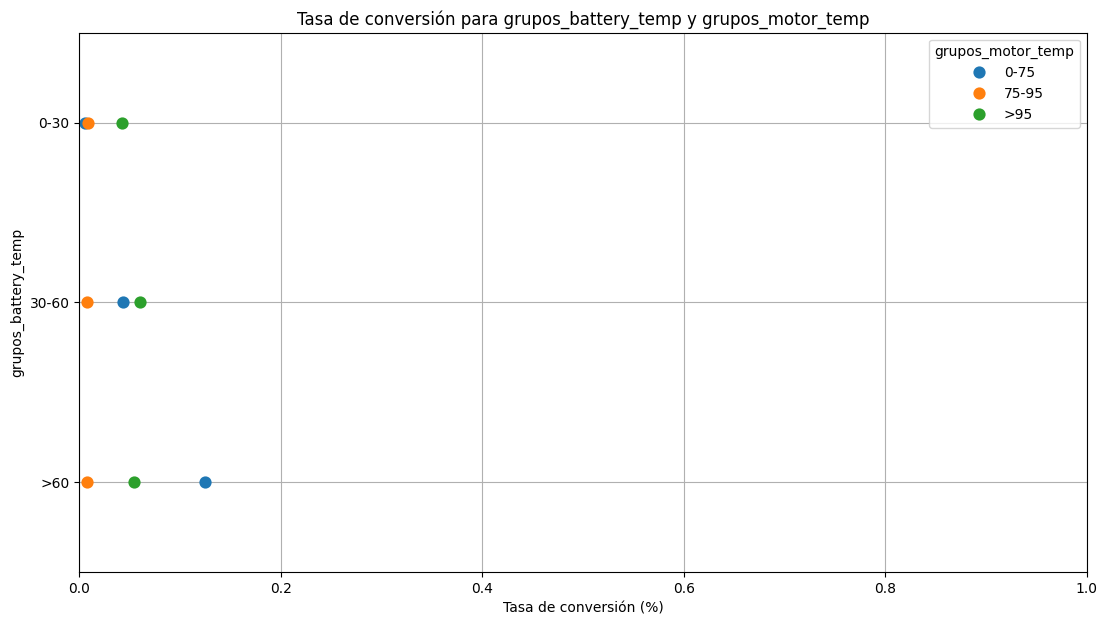

In [ ]:
graficar_bivariada(['grupos_battery_temp', 'grupos_motor_temp'])

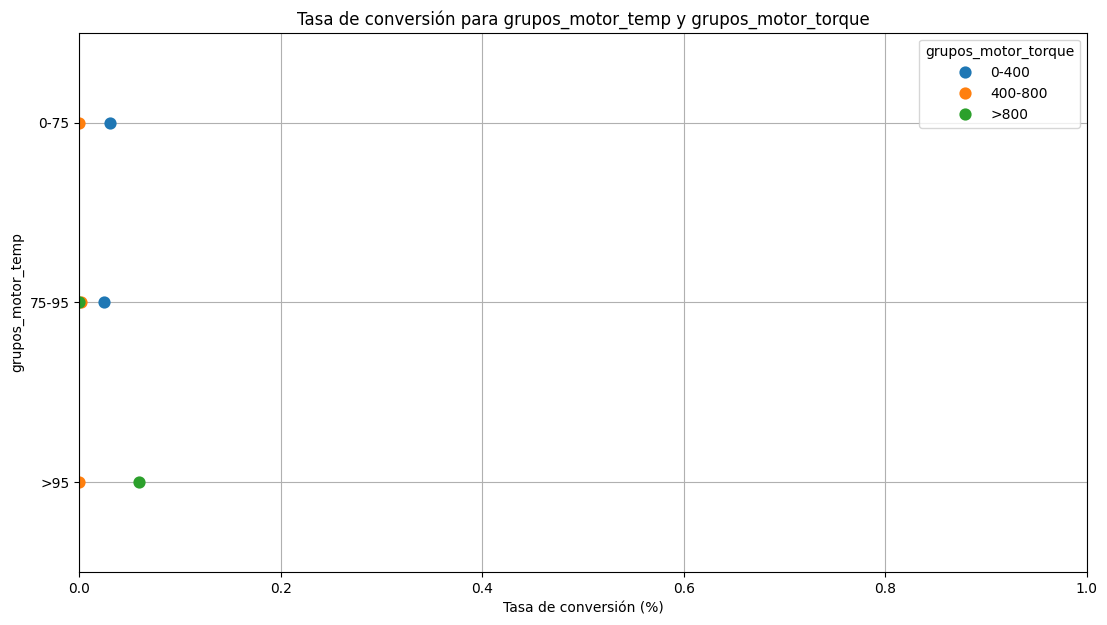

In [ ]:
graficar_bivariada(['grupos_motor_temp', 'grupos_motor_torque'])


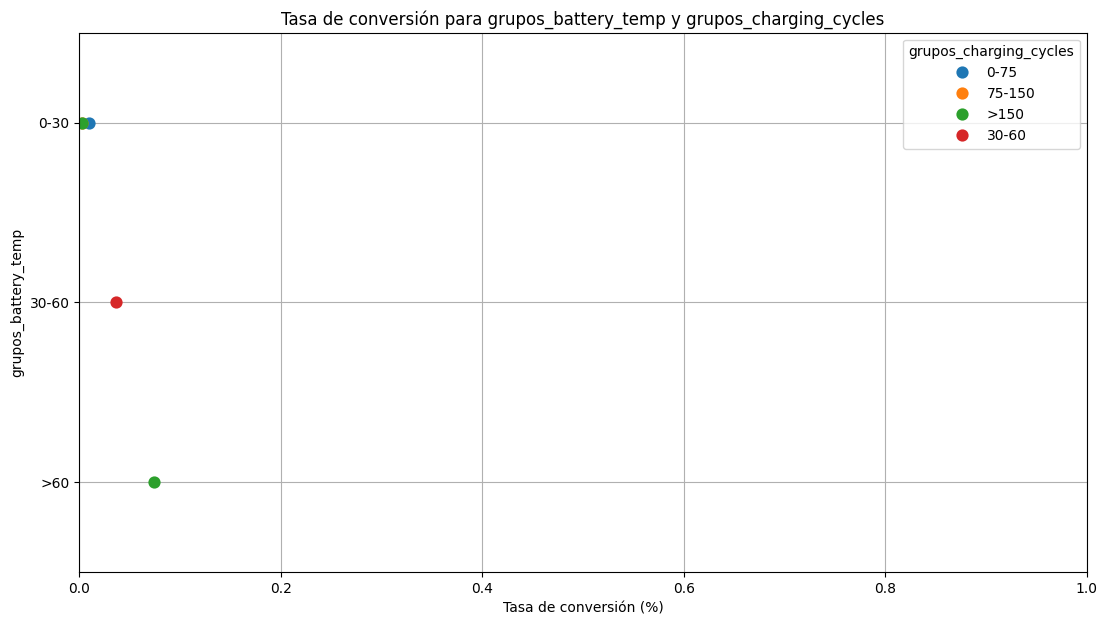

In [ ]:
graficar_bivariada(['grupos_battery_temp', 'grupos_charging_cycles'])

# **Conclusiones:**

Las tres gráficas bivariadas muestran que la mayoría de las tasas de conversión se concentran cerca del eje izquierdo, lo cual es completamente normal. Esto ocurre porque la proporción de fallos (DTC_bin = 1) en el dataset es baja —en promedio entre 2 % y 3 %—, reflejando que la mayoría de los vehículos eléctricos no presentan fallos.

Aun así, aunque los valores absolutos sean pequeños, las diferencias relativas entre grupos sí son significativas: los grupos con temperaturas más altas o mayor esfuerzo mecánico tienden a mostrar tasas de fallo más elevadas.

Por tanto, la distribución hacia la izquierda no indica un error, sino una característica propia del fenómeno que se está midiendo. Para mejorar la interpretación visual, se recomienda ajustar el eje X (por ejemplo, hasta 10 %) o utilizar gráficos de barras que destaquen mejor las diferencias entre categorías.